In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

import matplotlib as mpl
from matplotlib.pyplot import cm
from matplotlib import pyplot as plt

font = {'family': 'arial',
        'size': 14}
mpl.rc('font', **font)

%matplotlib inline

In [2]:
def lighten_color(color, amount=0.3):
        """
        Lightens the given color by multiplying (1-luminosity) by the given amount.
        Input can be matplotlib color string, hex string, or RGB tuple.

        Examples:
        >> lighten_color('g', 0.3)
        >> lighten_color('#F034A3', 0.6)
        >> lighten_color((.3,.55,.1), 0.5)
        """
        import matplotlib.colors as mc
        import colorsys
        try:
            c = mc.cnames[color]
        except:
            c = color
        c = colorsys.rgb_to_hls(*mc.to_rgb(c))
        return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [3]:
def ranksum(caseVals, controlVals):

    s, p = stats.ranksums(caseVals, controlVals)
    return p

# MD > 0; Mean* methylation

In [4]:
rawData0 = pd.read_csv('trainingAndValidationMD0Counts.csv')

In [5]:
trainCases0 = rawData0['training cases'].dropna().values
trainControls0 = rawData0['training controls'].dropna().values
validationCases0 = rawData0['validation cases'].dropna().values
validationControls0 = rawData0['validation controls'].dropna().values

statistics:
Training cases median = 28.002032815
Validation cases median = 30.432098765
Training controls median = 22.22222222
Validation controls median = 14.583333335
 
rank sum p-values:
Training vs Validation cases rank sum = 0.23620655337602614
Training vs Validation controls rank sum = 0.12597116307723114
Training cases vs controls rank sum = 0.7186529876661425
Validation cases vs controls rank sum = 0.057957947893948245


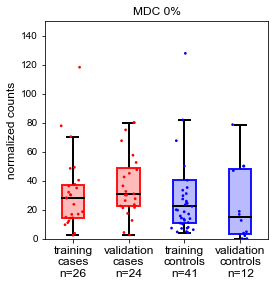

In [6]:
boxes = [trainCases0, validationCases0, trainControls0, validationControls0]
positions = [1, 2, 3, 4]
colors = ['red', 'red', 'blue', 'blue']
xlabels = ['training\ncases\nn=26', 'validation\ncases\nn=24', 'training\ncontrols\nn=41', 'validation\ncontrols\nn=12']

fig, ax = plt.subplots(figsize=(4, 4))
bp = ax.boxplot(boxes, positions=positions, widths=0.4, patch_artist=True)

for flier in bp['fliers']:
    flier.set(marker='', color='black')
for whisker in bp['whiskers']:
    whisker.set(color='black', linewidth=2)
for cap in bp['caps']:
    cap.set(color='black', linewidth=2)
for median in bp['medians']:
    median.set(color='black', linewidth=2)

for i in np.arange(len(boxes)):
    bp['boxes'][i].set(color=colors[i], linewidth=2, alpha=0.9)
    bp['boxes'][i].set(facecolor=lighten_color(colors[i]))
    scatter = ax.scatter(x=np.random.normal(positions[i], 0.1, size=len(boxes[i])),
                         y=boxes[i], c=colors[i], marker='.', edgecolors='', s=30, zorder=10)

ax.set_ylim([0, 150])

ax.set_xticklabels(xlabels, fontsize=12)
# ax.set_xlabel('Sample Sets', fontsize=12)
ax.set_ylabel('normalized counts', fontsize=12)
plt.title('MDC 0%')

# ax.set_yticks([0.0, 0.001, 0.002, 0.003, 0.004])
# ax.set_yticklabels([0.0, 0.001, 0.002, 0.003, 0.004], fontsize=12)


# plt.show()

print('statistics:')
print("Training cases median = {}".format(np.median(trainCases0)))
print("Validation cases median = {}".format(np.median(validationCases0)))
print("Training controls median = {}".format(np.median(trainControls0)))
print("Validation controls median = {}".format(np.median(validationControls0)))
print(' ')
print('rank sum p-values:')

# s1, p1 = stats.mannwhitneyu(trainCases0, validationCases0)
print("Training vs Validation cases rank sum = {}".format(ranksum(trainCases0, validationCases0)))

# s2, p2 = stats.mannwhitneyu(trainControls0, validationControls0)
print("Training vs Validation controls rank sum = {}".format(ranksum(trainControls0, validationControls0)))

# s3, p3 = stats.mannwhitneyu(trainCases0, trainControls0)
print("Training cases vs controls rank sum = {}".format(ranksum(trainCases0, trainControls0)))

# s4, p4 = stats.mannwhitneyu(validationCases0, validationControls0)
print("Validation cases vs controls rank sum = {}".format(ranksum(validationCases0, validationControls0)))

plt.savefig('SupplementalFigureS9-v2.png', bbox_inches='tight', pad_inches=0.5, dpi=600)